## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Import Data 

In [2]:
search = pd.read_csv(r"E:\Job Tasks\NinijaCart\search.csv")
search.head(2)

,userid,city,transaction_id,geocoordinates,timestamp
0,7870,std:080,642114c3-5b96-412c-afd1-446d1fedd9e5,"12.9073097,77.6291364",28-11-2023 17:54
1,5312,std:080,C2311281534511475941581,"12.9036423,77.6363803",28-11-2023 17:54


In [3]:
select = pd.read_csv(r"E:\Job Tasks\NinijaCart\select.csv")
select.head(2)

,transaction_id
0,22b22941-bf55-4f9d-9dcf-08b06bb86f10
1,C2311281437299555677442


In [5]:
confirm = pd.read_csv(r"E:\Job Tasks\NinijaCart\confirm.csv")
confirm.head(2)

,transaction_id
0,C2311281411032549365493
1,C2311191124546531329886


In [4]:
success = pd.read_csv(r"E:\Job Tasks\NinijaCart\success.csv")
success.head(2)

,transaction_id
0,9072f385-68bf-468a-9bb1-fe9bf679bd4c
1,C2311281254098706456166


## Exploratory Data Analysis

#### 1.  User funnel based on the 4 pages (Search, Select, Confirm, Success). Visualize the drop-off at each step to see how many users progress through the funnel

In [266]:
# Calculate transaction counts for each stage
transaction_count_search = len(search)
transaction_count_select = len(select)
transaction_count_confirm = len(confirm)
transaction_count_success = len(success)

# Calculate the percentage at each stage
total_users = transaction_count_search  # Assuming total users at the search stage is the total count

percentage_search = round((transaction_count_search / total_users) * 100, 0)
percentage_select = round((transaction_count_select / total_users) * 100, 2)
percentage_confirm = round((transaction_count_confirm / total_users) * 100, 2)
percentage_success = round((transaction_count_success / total_users) * 100, 2)

# Create a DataFrame
transaction_count = pd.DataFrame({
    'stage': ['Search', 'Select', 'Confirm', 'Success'],
    'transaction_count': [transaction_count_search, transaction_count_select, transaction_count_confirm, transaction_count_success],
    'percentage': [percentage_search, percentage_select, percentage_confirm, percentage_success]
})

# Create text labels with percentages
text_labels = [f'{percentage}%' for percentage in transaction_count['percentage']]

fig = px.funnel(transaction_count, x='transaction_count', y='stage',
                labels={'transaction_count': 'Transaction Count', 'stage': 'Stage', 'text':'% User Count'},
                title="Search Impressions to Sales",
                text=text_labels,  # Display percentage on the funnel
                height=500
            )

# Update layout with annotations
fig.update_layout(annotations=[
    dict(
        x=-0.044, y=1.13, xref='paper', yref='paper',
        text='Transactions Count and Percentage at Each Stage',
        showarrow=False,
        font=dict(size=13, color='grey'),
    )
])

fig.show()


#### 2.  Top geocoordinates by search?

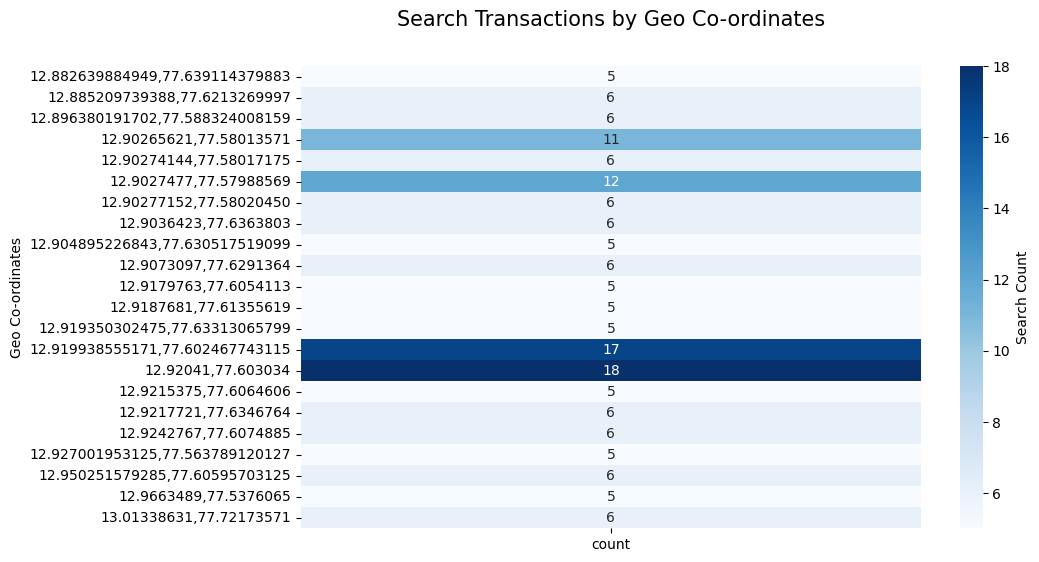

In [139]:
heatmap_data = search.groupby('geocoordinates').size().reset_index(name='count')

# Create the heatmap using seaborn and pivot_table
heatmap_data_pivot = heatmap_data.pivot_table(index='geocoordinates', values='count')

# Create the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_pivot, annot=True, fmt="g", cmap="Blues", cbar_kws={'label': 'Search Count'})
plt.title('Search Transactions by Geo Co-ordinates', fontsize=15, y=1.07)
plt.ylabel('Geo Co-ordinates')
plt.show()

#### 3.  Top cities by search?

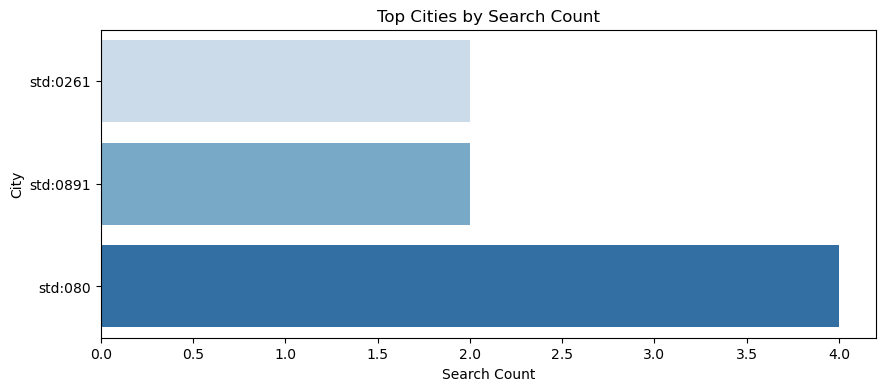

In [148]:
# top cities
city_search_count = search.groupby('city').transaction_id.count().reset_index().sort_values(by='transaction_id', ascending=True).tail(3)

# Create a bar chart
plt.figure(figsize=(10, 4))
sns.barplot(x='transaction_id', y='city', data=city_search_count, palette='Blues')

# Add labels and title
plt.xlabel('Search Count')
plt.ylabel('City')
plt.title('Top Cities by Search Count')

# Show the plot
plt.show()

#### 4. Top geocoordinatess in top 3 cities by search?

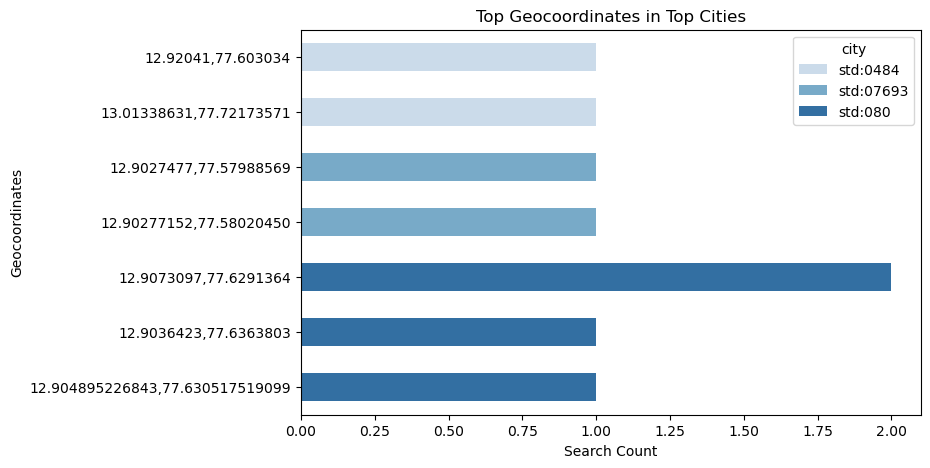

In [173]:
# top cotoes
top_cities = search.groupby('city').transaction_id.count().reset_index().sort_values(by='transaction_id', ascending=False).head(3)

# Filter the DataFrame to include only rows from the top 3 cities
filtered_df = search[search.city.isin(top_cities.city)]

# Find the most top geocoordinates in each cities based on search count
top_geocoordinates = (
    filtered_df.groupby(['city', 'geocoordinates'])
    .size()
    .reset_index(name='count')
    .sort_values(by=['city', 'count'], ascending=[True, False])
    .groupby('city').head(3)
)

# Create a grouped bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='count', y='geocoordinates', hue='city', data=top_geocoordinates, palette='Blues', dodge=False, width=0.5)

# Add labels and title
plt.xlabel('Search Count')
plt.ylabel('Geocoordinates')
plt.title('Top Geocoordinates in Top Cities')

# Show the plot
plt.show()